<a href="https://colab.research.google.com/github/kdovin/project_Lovely-G.4_none/blob/main/_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<데이터 불러오기>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 기본 한글 폰트로 설정
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'C:/Windows/Fonts/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
plt.rcParams['font.family'] = 'NanumGothic'

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 무시
import random, warnings
warnings.filterwarnings("ignore")

Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


- sales_train.csv - 훈련 세트. 2013년 1월부터 2015년 10월까지의 일일 과거 데이터
- test.csv - 테스트 세트. 이 상점과 제품의 2015년 11월 매출을 예측하는 것이 목표
- Sample_submission.csv - 샘플 제출 파일
- items.csv - 품목/제품에 대한 추가 정보
- item_categories.csv   - 항목 카테고리에 대한 추가 정보
- Shops.csv - 상점에 대한 추가 정보

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/sales_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/sample_submission.csv')
shops_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/shops.csv')
items_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/items.csv')
item_cat_df = pd.read_csv('/content/drive/MyDrive/데이터/미래 매출/item_categories.csv')

#<데이터 살펴보기>

- ID  - 테스트 세트 내의 (상점, 아이템) 튜플을 나타내는 ID
- shop_id - 상점의 고유 식별자
- item_id - 제품의 고유 식별자
- item_category_id - 품목 카테고리의 고유 식별자
- item_cnt_day - 판매된 제품 수 (목표 변수) -> 월별로 예측해야 함.
- item_price - 품목의 현재 가격
- date - dd/mm/yyyy 형식의 날짜
- date_block_num - 편의를 위해 사용되는 연속된 월 번호. 2013년 1월은 0, 2013년 2월은 1,..., 2015년 10월은 33
- item_name  - 아이템 이름
- shop_name - 상점 이름
- item_category_name - 아이템 카테고리의 이름

In [ ]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [ ]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
shops_df.tail()

,shop_name,shop_id
55,Цифровой склад 1С-Онлайн,55
56,"Чехов ТРЦ ""Карнавал""",56
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58
59,"Ярославль ТЦ ""Альтаир""",59


In [ ]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
item_cat_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
train_df.info()
# 2935849개 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
test_df.info()
# 214200개 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


In [ ]:
shops_df.info()
# 60개 상점

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
items_df.info()
# 22170개 품목

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [ ]:
item_cat_df.info()
# 84개 품목 카테고리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
# 음수인 데이터 확인
negative_values = train_df[train_df['item_cnt_day'] < 0]
print("음수인 데이터:")
print(negative_values)

음수인 데이터:
               date  date_block_num  shop_id  item_id  item_price  \
2        05.01.2013               0       25     2552       899.0   
148      23.01.2013               0       25     2321       999.0   
175      07.01.2013               0       25     2199      1449.0   
807      02.01.2013               0       25     2330       599.0   
1041     13.01.2013               0       25     5034      1989.0   
...             ...             ...      ...      ...         ...   
2934243  26.10.2015              33       25     3917       449.0   
2934462  18.10.2015              33       25     4896      6398.0   
2935263  05.10.2015              33       25    10039       249.0   
2935643  16.10.2015              33       25     7893      2990.0   
2935779  07.10.2015              33       25     7087       999.0   

         item_cnt_day  
2                -1.0  
148              -1.0  
175              -1.0  
807              -1.0  
1041             -1.0  
...               


- item_cnt_day 변수가 음수인 행들을 0으로 변경해야겠당. -> 환불로 추정
- 대회 규칙에도 실제 목표 값은 [0,20] 범위로 잘린다고 함.음수 처리해도 됨

#<결측치>

In [ ]:
#결측치 확인 -> 없음
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
shops_df.isnull().sum()[shops_df.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
items_df.isnull().sum()[items_df.isnull().sum()>0]

Series([], dtype: int64)

In [ ]:
item_cat_df.isnull().sum()[item_cat_df.isnull().sum()>0]

Series([], dtype: int64)

#<시각화>

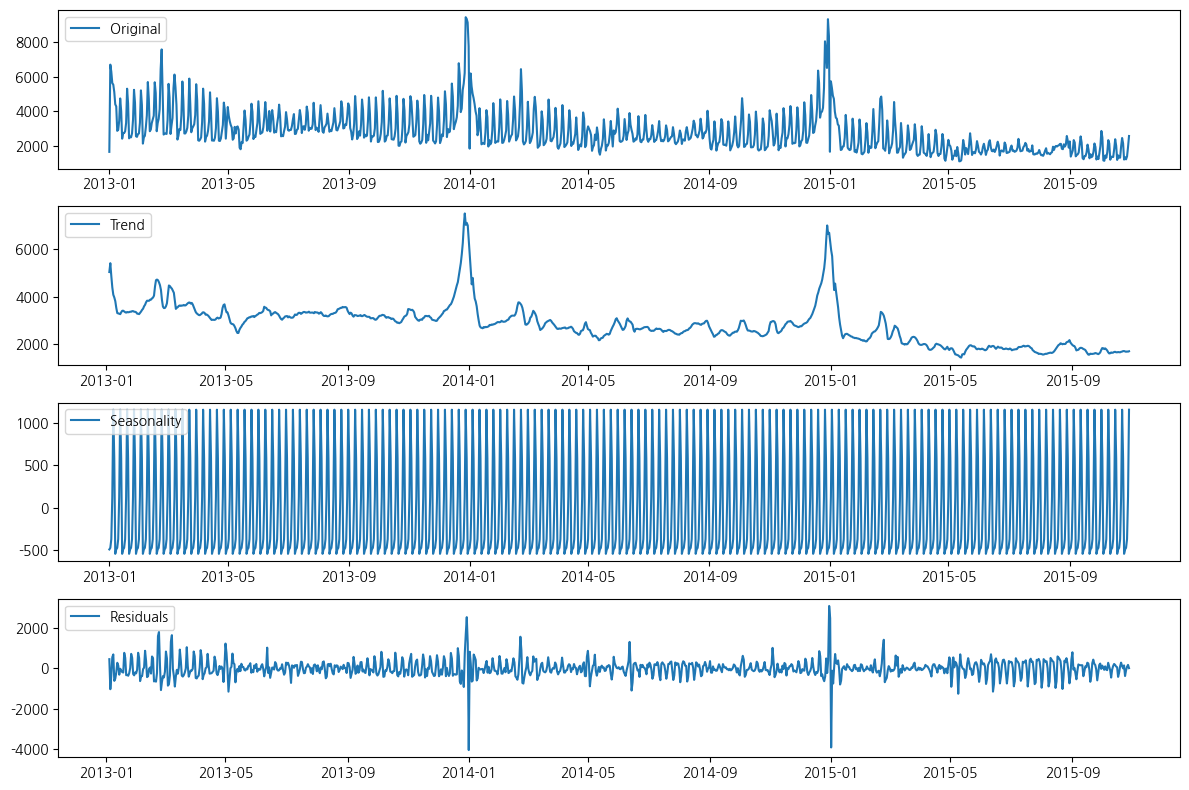

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 날짜 열을 datetime 형식으로 변환
train_df['date'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')

# 판매가 발생한 날짜만 추출
sold_dates = train_df[train_df['item_cnt_day'] > 0]['date']

# 판매가 발생한 날짜를 인덱스로 사용하여 시계열 데이터 생성
ts = pd.Series(data=1, index=sold_dates)

# 시계열 데이터 리샘플링(일별)
ts_daily = ts.resample('D').sum()  # 매일매일 판매량을 합산

# 시계열 분해 수행
decomposition = seasonal_decompose(ts_daily, model='additive')

# 추세, 계절성, 잔차 시각화
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(ts_daily, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

- 매년 말 판매량 급증 -> 오프 세일이라도 하는 걸까?
- 5월쯤 저조함

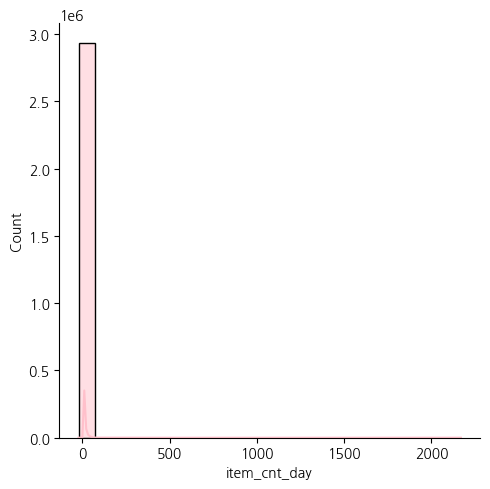

In [ ]:
# 목표변수의 분포
sns.displot(data=train_df, x='item_cnt_day',color='pink', kde=True)

<Axes: ylabel='item_cnt_day'>

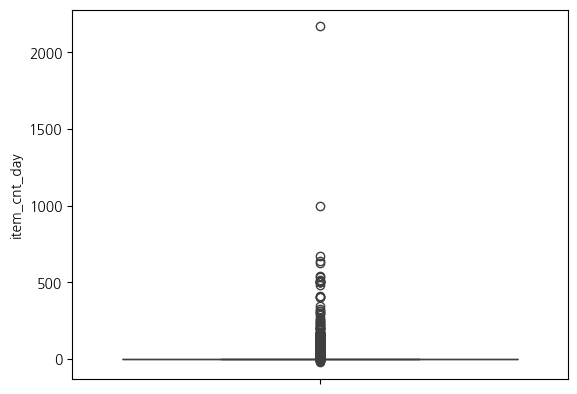

In [ ]:
sns.boxplot(y='item_cnt_day', data=train_df)

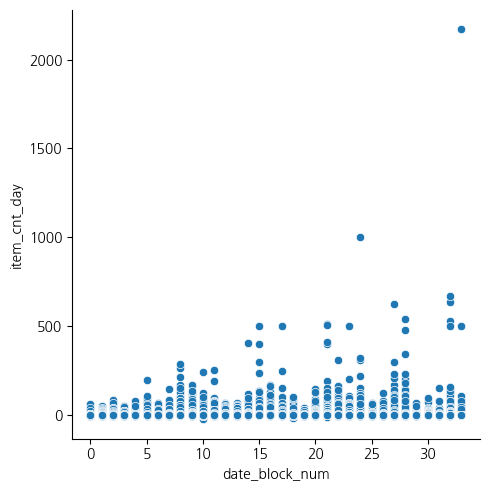

In [ ]:
#월별 판매량 date_block_num과 item_cnt_day
sns.relplot(data=train_df, x="date_block_num", y="item_cnt_day")

- date_block_num과 item_cnt_day을 묶어서 '월별 판매량' 파생변수를 만들어야겠당.
- 점점 판매량 증가...? 라기엔 너무 값이 띄엄띄엄인데...
- 일단 이상치들 확인. 어차피 0-20만 예측하니까 과한 이상치들은 과감하게 정리해도 되겠당.

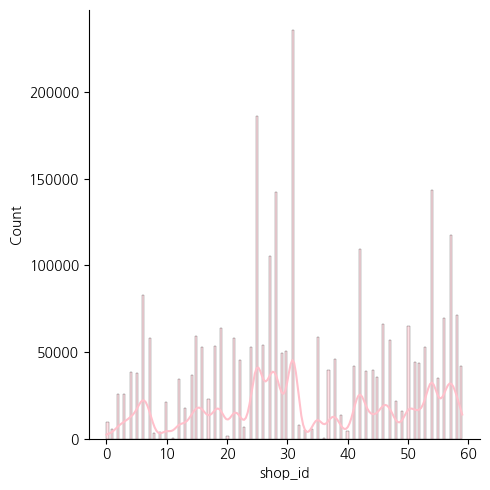

In [ ]:
#shop의 분포
sns.displot(data=train_df, x='shop_id',color='pink', kde=True)

In [ ]:
# shop_id의 최빈값 확인
mode_value = train_df['shop_id'].mode().iloc[0]
print("shop_id 최빈값:", mode_value)
'\n'
# 각 값의 빈도 계산
value_counts = train_df['shop_id'].value_counts()

# 최빈값이 아닌 값 중에서 가장 많이 등장하지 않는 값을 찾음
least_frequent_value = value_counts[value_counts == value_counts.min()].index[0]

print("최소빈도 값:", least_frequent_value)

shop_id 최빈값: 31
최소빈도 값: 36


In [ ]:
specific_row = shops_df.iloc[31]  # 31번째 행 선택 (0부터 시작하는 인덱스)
print("31번째 행 확인:")
print(specific_row)
'\n'
specific_row1 = shops_df.iloc[36]  # 36번째 행 선택 (0부터 시작하는 인덱스)
print("36번째 행 확인:")
print(specific_row1)

31번째 행 확인:
shop_name    Москва ТЦ "Семеновский"
shop_id                           31
Name: 31, dtype: object
36번째 행 확인:
shop_name    Новосибирск ТРЦ "Галерея Новосибирск"
shop_id                                         36
Name: 36, dtype: object


- Москва ТЦ "Семеновский" : 모스크바 쇼핑센터 "세메노프스키"
- Новосибирск ТРЦ "Галерея Новосибирск" : 노보시비르스크 쇼핑센터 "갤러리 노보시비르스크"
- shop_id의 앞에 단어는 모두 도시 이름

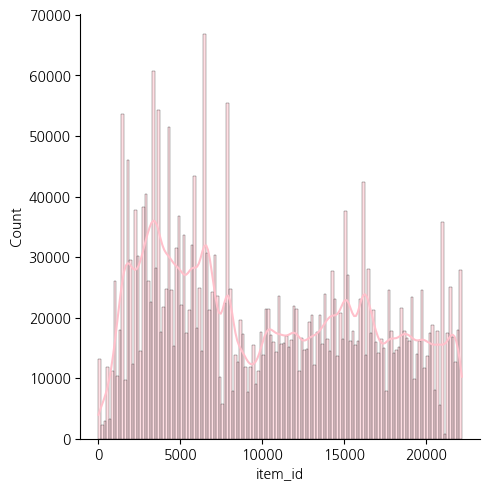

In [ ]:
#item의 분포
sns.displot(data=train_df, x='item_id',color='pink', kde=True)

In [ ]:
# item_id의 최빈값 확인
mode_value = train_df['item_id'].mode().iloc[0]
print("item_id 최빈값:", mode_value)
'\n'
# 각 값의 빈도 계산
value_counts = train_df['item_id'].value_counts()

# 최빈값이 아닌 값 중에서 가장 많이 등장하지 않는 값을 찾음
least_frequent_value = value_counts[value_counts == value_counts.min()].index[0]

print("최소빈도 값:", least_frequent_value)

item_id 최빈값: 20949
최소빈도 값: 1661


In [ ]:
specific_row = items_df.iloc[31]  # 20949번째 행 선택 (0부터 시작하는 인덱스)
print("20949번째 행 확인:")
print(specific_row)
'\n'
specific_row1 = items_df.iloc[36]  # 1661번째 행 선택 (0부터 시작하는 인덱스)
print("1661번째 행 확인:")
print(specific_row1)

20949번째 행 확인:
item_name           007: КООРДИНАТЫ «СКАЙФОЛЛ» (BD)
item_id                                          31
item_category_id                                 37
Name: 31, dtype: object
1661번째 행 확인:
item_name           10 ЛЕТ СПУСТЯ (BD)
item_id                             36
item_category_id                    37
Name: 36, dtype: object


<Axes: ylabel='item_price'>

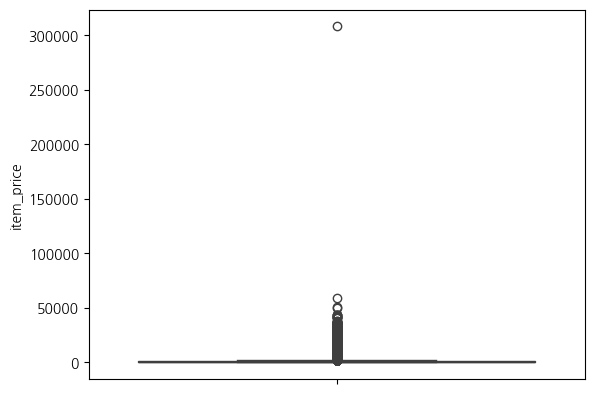

In [ ]:
sns.boxplot(y='item_price', data=train_df)

In [ ]:
# column_name 열에서 특정 값 이상인 데이터 행 확인
filtered_rows = train_df[train_df['item_price'] >= 300000].index.tolist()

# 확인된 데이터 행 출력
print(filtered_rows)

[1163158]


In [ ]:
train_df.loc[1163158]

date              2013-12-13 00:00:00
date_block_num                     11
shop_id                            12
item_id                          6066
item_price                   307980.0
item_cnt_day                      1.0
Name: 1163158, dtype: object

In [ ]:
train_df['item_price'].mean()

890.8532326980126

- 이상치(30만 7,980 루블 = 461만 6,620.20 원)가 있지만 가격이므로 가능한 값 but 제거 고려 해보자
- 평균 판매가 : 890.8532326980126루블 = 1만 3,353.84 원라서 460만원은 좀 이상치 같기두

In [ ]:
train = train_df.join(items_df, on='item_id', rsuffix='_').join(shops_df, on='shop_id', rsuffix='_').join(item_cat_df, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)
train.head().T

,0,1,2,3,4
date,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-15 00:00:00
date_block_num,0,0,0,0,0
shop_id,59,25,25,25,25
item_id,22154,2552,2552,2554,2555
item_price,999.0,899.0,899.0,1709.05,1099.0
item_cnt_day,1.0,1.0,-1.0,1.0,1.0
item_name,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP,DEEP PURPLE The House Of Blue Light LP,DEEP PURPLE Who Do You Think We Are LP,DEEP PURPLE 30 Very Best Of 2CD (Фирм.)
item_category_id,37,58,58,58,56
shop_name,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум"""
item_category_name,Кино - Blu-Ray,Музыка - Винил,Музыка - Винил,Музыка - Винил,Музыка - CD фирменного производства


In [ ]:
# monthly 데이터로 그룹화
train_monthly = train_df[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]
train_monthly.head()
'\n'
# 목표변수와의 관계 평균
gp_month_mean = train_monthly.groupby(['month'], as_index=False)['item_cnt'].mean()
gp_month_sum = train_monthly.groupby(['month'], as_index=False)['item_cnt'].sum()
gp_category_mean = train_monthly.groupby(['item_category_id'], as_index=False)['item_cnt'].mean()
gp_category_sum = train_monthly.groupby(['item_category_id'], as_index=False)['item_cnt'].sum()
gp_shop_mean = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].mean()
gp_shop_sum = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].sum()

#월별 판매량 시각화
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.lineplot(x="month", y="item_cnt", data=gp_month_mean, ax=axes[0]).set_title("Monthly mean")
sns.lineplot(x="month", y="item_cnt", data=gp_month_sum, ax=axes[1]).set_title("Monthly sum")
plt.show()

KeyError: "['item_category_id'] not in index"

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.lineplot(x="month", y="item_cnt", data=gp_month_mean, ax=axes[0]).set_title("Monthly mean")
sns.lineplot(x="month", y="item_cnt", data=gp_month_sum, ax=axes[1]).set_title("Monthly sum")
plt.show()

#<이상치 처리>

In [ ]:
# item_cnt_day 변수가 음수인 행들을 0으로 변경
train_df.loc[train_df['item_cnt_day'] < 0, 'item_cnt_day'] = 0

print(train_df)